In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import time
import logging

In [2]:
# Import Datasets
reddit_df = pd.read_csv('Reddit_Data.csv', delimiter=',')
twitter_df = pd.read_csv('Twitter_Data.csv', delimiter=',')

reddit_count = reddit_df.shape[0]
twitter_count = twitter_df.shape[0]

print(f"Count of Rows in Reddit Dataset: {reddit_count}")
print(f"Count of Rows in Twitter Dataset: {twitter_count}")

Count of Rows in Reddit Dataset: 37249
Count of Rows in Twitter Dataset: 162980


In [3]:
# Rename Column to be the same as the text column from the other dataset
reddit_df = reddit_df.rename(columns={'clean_comment': 'clean_text'})

In [4]:
# Combine both datasets
concatenated_df = pd.concat([reddit_df, twitter_df], ignore_index=True)

In [5]:
# Info and see Non Null Count
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  200125 non-null  object 
 1   category    200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [6]:
concatenated_df

,clean_text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0
...,...,...
200224,why these 456 crores paid neerav modi not reco...,-1.0
200225,dear rss terrorist payal gawar what about modi...,-1.0
200226,did you cover her interaction forum where she ...,0.0
200227,there big project came into india modi dream p...,0.0


In [7]:
len(concatenated_df['clean_text'].iloc[1])

1269

In [8]:
# Find how many texts are just empty spaces
concatenated_df[concatenated_df['clean_text'] == ' '].shape[0]

116

In [9]:
df = concatenated_df.copy()
filtered_df = df[df['clean_text'] != ' ']

In [10]:
filtered_df[filtered_df['clean_text'] == ' '].shape[0]

0

In [11]:
# Find Letter Count without accounting for empty spaces
filtered_df['letter_count'] = filtered_df['clean_text'].apply(
    lambda text: len(text.replace(" ", "")) if isinstance(text, str) else 0
)
filtered_df['word_count'] = filtered_df['clean_text'].apply(lambda text: len(str(text).split()))


/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_63788/2873248364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['letter_count'] = filtered_df['clean_text'].apply(
/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_63788/2873248364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['word_count'] = filtered_df['clean_text'].apply(lambda text: len(str(text).split()))


In [12]:
filtered_df

,clean_text,category,letter_count,word_count
0,family mormon have never tried explain them t...,1.0,221,39
1,buddhism has very much lot compatible with chr...,1.0,1073,196
2,seriously don say thing first all they won get...,-1.0,374,86
3,what you have learned yours and only yours wha...,0.0,139,29
4,for your own benefit you may want read living ...,1.0,579,112
...,...,...,...,...
200224,why these 456 crores paid neerav modi not reco...,-1.0,90,18
200225,dear rss terrorist payal gawar what about modi...,-1.0,213,36
200226,did you cover her interaction forum where she ...,0.0,42,9
200227,there big project came into india modi dream p...,0.0,65,13


In [13]:
filtered_df[['letter_count', 'word_count']].describe()

,letter_count,word_count
count,200113.000000,200113.000000
mean,113.468855,21.812941
std,141.308474,26.531324
min,0.000000,0.000000
25%,51.000000,10.000000
50%,91.000000,18.000000
75%,154.000000,29.000000
max,7358.000000,1307.000000


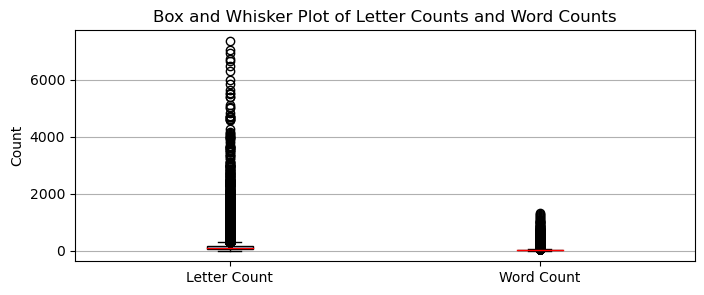

In [14]:
plt.figure(figsize=(8, 3))

# Create a boxplot for both letter_count and word_count
plt.boxplot([filtered_df['letter_count'], filtered_df['word_count']], vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

# Adding labels and title
plt.xticks([1, 2], ['Letter Count', 'Word Count']) 
plt.ylabel('Count')
plt.title('Box and Whisker Plot of Letter Counts and Word Counts')
plt.grid(axis='y')

# Show the plot
plt.show()

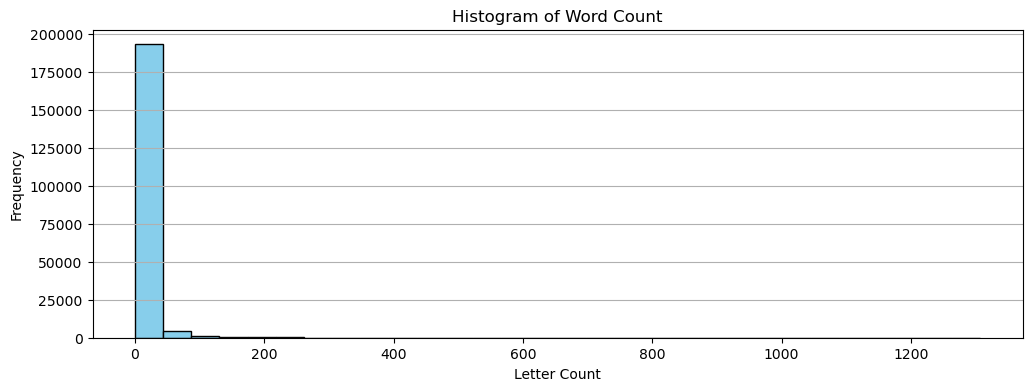

In [15]:
plt.figure(figsize=(12, 4))
plt.hist(filtered_df['word_count'], bins=30, color='skyblue', edgecolor='black') 
plt.xlabel('Letter Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
plt.grid(axis='y')
plt.show()

In [16]:
text_data = ' '.join(concatenated_df['clean_text'].dropna())

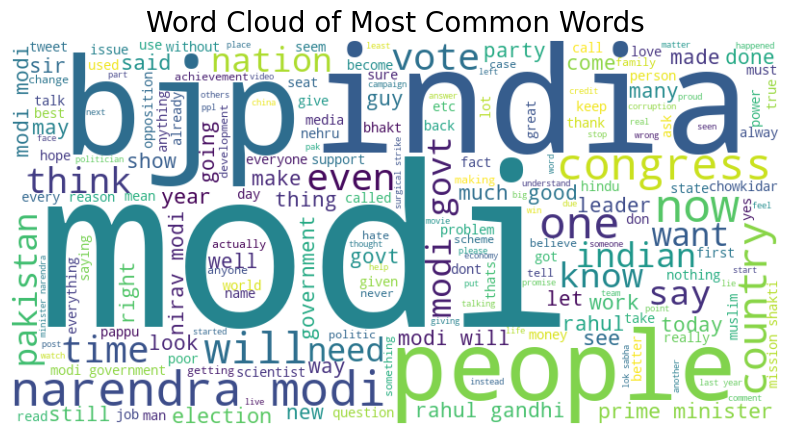

In [17]:
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Most Common Words', fontsize=20)
plt.show()

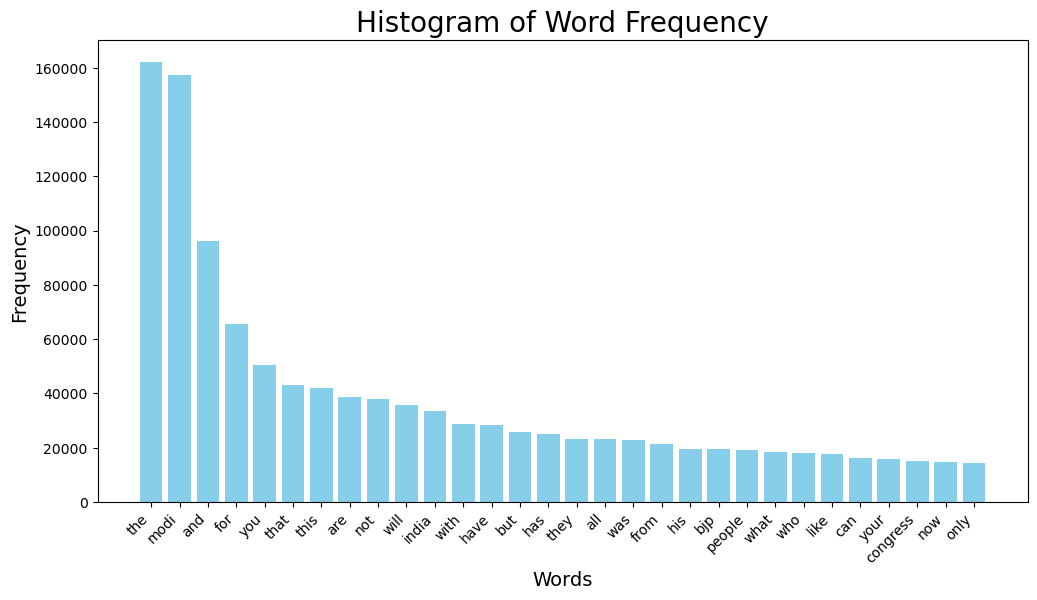

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequencies
word_counts = Counter(text_data.split())  # Assuming text_data is a string of your text

# Get the most common words and their counts
most_common_words = word_counts.most_common(30)  # Adjust the number of words as needed

# Separate the words and counts for plotting
words, counts = zip(*most_common_words)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Word Frequency', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()